In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../clean_dataset/biomatric_cleaned_dataset.csv")

In [3]:
df.head(10)

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,Haryana,Mahendragarh,123029,280,577
1,2025-03-01,Bihar,Madhepura,852121,144,369
2,2025-03-01,Jammu And Kashmir,Punch,185101,643,1091
3,2025-03-01,Bihar,Bhojpur,802158,256,980
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815
5,2025-03-01,Maharashtra,Ratnagiri,416702,155,529
6,2025-03-01,Gujarat,Anand,388130,75,143
7,2025-03-01,Gujarat,Gandhinagar,382421,192,298
8,2025-03-01,Odisha,Dhenkanal,759025,122,214
9,2025-03-01,Gujarat,Valsad,396055,67,85


In [4]:
df.rename(columns={"bio_age_17_":"bio_age_17_greater"}, inplace=True)

In [5]:
df.shape # totla record

(1861108, 6)

In [6]:
df["total_update"] = df["bio_age_5_17"] + df["bio_age_17_greater"]

In [7]:
df.head(3)

,date,state,district,pincode,bio_age_5_17,bio_age_17_greater,total_update
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,857
1,2025-03-01,Bihar,Madhepura,852121,144,369,513
2,2025-03-01,Jammu And Kashmir,Punch,185101,643,1091,1734


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   date                object
 1   state               object
 2   district            object
 3   pincode             int64 
 4   bio_age_5_17        int64 
 5   bio_age_17_greater  int64 
 6   total_update        int64 
dtypes: int64(4), object(3)
memory usage: 99.4+ MB


In [9]:
df.describe()

,pincode,bio_age_5_17,bio_age_17_greater,total_update
count,1.861108e+06,1.861108e+06,1.861108e+06,1.861108e+06
mean,5.217612e+05,1.839058e+01,1.909413e+01,3.748471e+01
std,1.981627e+05,8.370421e+01,8.806502e+01,1.623302e+02
min,1.100010e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.911750e+05,1.000000e+00,1.000000e+00,3.000000e+00
50%,5.224010e+05,3.000000e+00,4.000000e+00,8.000000e+00
75%,6.866362e+05,1.100000e+01,1.000000e+01,2.200000e+01
max,8.554560e+05,8.002000e+03,7.625000e+03,1.338100e+04


In [10]:
df.isnull().sum()

date                  0
state                 0
district              0
pincode               0
bio_age_5_17          0
bio_age_17_greater    0
total_update          0
dtype: int64

In [11]:
df["state"] = df["state"].replace({"Tamilnadu":"Tamil Nadu"})

In [12]:
sorted(df.state.unique())

['Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhatisgarh',
 'Chhattisgarh',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'Uttaranchal',
 'West Bengal']

In [13]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, format='mixed', errors='coerce')

In [14]:
df.head(2)

,date,state,district,pincode,bio_age_5_17,bio_age_17_greater,total_update
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,857
1,2025-03-01,Bihar,Madhepura,852121,144,369,513


In [15]:
print(f"total_update: {df["total_update"].sum()}")

total_update: 69763095


In [16]:
# Age group analysis

In [17]:
age_cols = ["bio_age_5_17", "bio_age_17_greater"]
age_sum = df[age_cols].sum()

In [18]:
age_sum

bio_age_5_17          34226855
bio_age_17_greater    35536240
dtype: int64

In [19]:
# B. State-wise Analysis

In [20]:
state_stats = df.groupby('state')[['total_update'] + age_cols].sum()
state_stats = state_stats.sort_values("total_update",ascending=False)

In [21]:
state_stats

,total_update,bio_age_5_17,bio_age_17_greater
state,,,
Uttar Pradesh,9577735,6207105,3370630
Maharashtra,9226139,3512712,5713427
Madhya Pradesh,5923771,3200117,2723654
Bihar,4897587,2208141,2689446
Tamil Nadu,4698118,2227253,2470865
Rajasthan,3994955,2066747,1928208
Andhra Pradesh,3714633,2241467,1473166
Gujarat,3196514,1460655,1735859
Chhattisgarh,2648729,884553,1764176


In [39]:
top_5_states = state_stats.head(5)
top_10_states = state_stats.head(10)

In [40]:
top_10_states

,total_update,bio_age_5_17,bio_age_17_greater
state,,,
Uttar Pradesh,9577735,6207105,3370630
Maharashtra,9226139,3512712,5713427
Madhya Pradesh,5923771,3200117,2723654
Bihar,4897587,2208141,2689446
Tamil Nadu,4698118,2227253,2470865
Rajasthan,3994955,2066747,1928208
Andhra Pradesh,3714633,2241467,1473166
Gujarat,3196514,1460655,1735859
Chhattisgarh,2648729,884553,1764176


In [24]:
# C. Time Series Analysis (Monthly Trend)

In [25]:
monthly_trend = df.set_index('date')[['total_update']].resample('ME').sum()

In [26]:
monthly_trend

,total_update
date,
2025-03-31,8322222
2025-04-30,8641679
2025-05-31,7879956
2025-06-30,7899289
2025-07-31,9792552
2025-08-31,0
2025-09-30,6654928
2025-10-31,4582655
2025-11-30,7285506


In [27]:
district_fixes = {
    'North Dinajpur': 'Uttar Dinajpur',
    'South Dinajpur': 'Dakshin Dinajpur',
    'West Medinipur': 'Paschim Medinipur',
    'East Midnapur': 'Purba Medinipur',
    'Maldah': 'Malda',
    'Hugli': 'Hooghly',
    'South 24 Pargana': 'South 24 Parganas',
    'Baudh': 'Boudh',
    'Khorda': 'Khordha',
    'Palamau': 'Palamu',
    'Mahabub Nagar': 'Mahabubnagar',
    'Karim Nagar': 'Karimnagar',
    'Janjgir Champa': 'Janjgir-Champa',
    'Lahaul And Spiti': 'Lahul And Spiti',
    'S.A.S Nagar': 'S.A.S. Nagar',
    'Davanagere': 'Davangere',
    'Tirupathur': 'Tirupattur',
    'Banas Kantha': 'Banaskantha',
    'Jalore': 'Jalor',
    'Tamulpur District': 'Tamulpur',
    'Balasore': 'Baleshwar',
    'Jajapur': 'Jajpur',
    'Jagatsinghapur': 'Jagatsinghpur',
    'Unknown': 'DELETE',
    'Anantapur': 'Ananthapuramu',
    'Ananthapur': 'Ananthapuramu',
    'Nellore': 'Sri Potti Sriramulu Nellore',
    'Cuddapah': 'Y. S. R'
}

df['district'] = df['district'].replace(district_fixes)

In [28]:
# D. District Analysis for Top State (Uttar Pradesh)

In [30]:
up_data = df[df['state'] == 'Uttar Pradesh']
top_districts_up = up_data.groupby('district')['total_update'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Districts in UP:\n", top_districts_up)


Top 10 Districts in UP:
 district
Prayagraj     279133
Sitapur       264311
Agra          235048
Bareilly      234808
Lucknow       217390
Bijnor        217048
Hardoi        205097
Aligarh       199500
Ghaziabad     192022
Saharanpur    190716
Name: total_update, dtype: int64


In [31]:
# E. Age Composition for Top 5 States (Percentage) 

In [32]:
top_5_states_names = top_5_states.index
top_5_age_comp = state_stats.loc[top_5_states_names, age_cols]

In [33]:
top_5_age_comp

,bio_age_5_17,bio_age_17_greater
state,,
Uttar Pradesh,6207105,3370630
Maharashtra,3512712,5713427
Madhya Pradesh,3200117,2723654
Bihar,2208141,2689446
Tamil Nadu,2227253,2470865


In [34]:
# Normalize to get percentages
top_5_age_pct = top_5_age_comp.div(top_5_age_comp.sum(axis=1), axis=0) * 100

In [35]:
top_5_age_pct

,bio_age_5_17,bio_age_17_greater
state,,
Uttar Pradesh,64.807650,35.192350
Maharashtra,38.073478,61.926522
Madhya Pradesh,54.021619,45.978381
Bihar,45.086305,54.913695
Tamil Nadu,47.407345,52.592655


In [ ]:
# visualization 

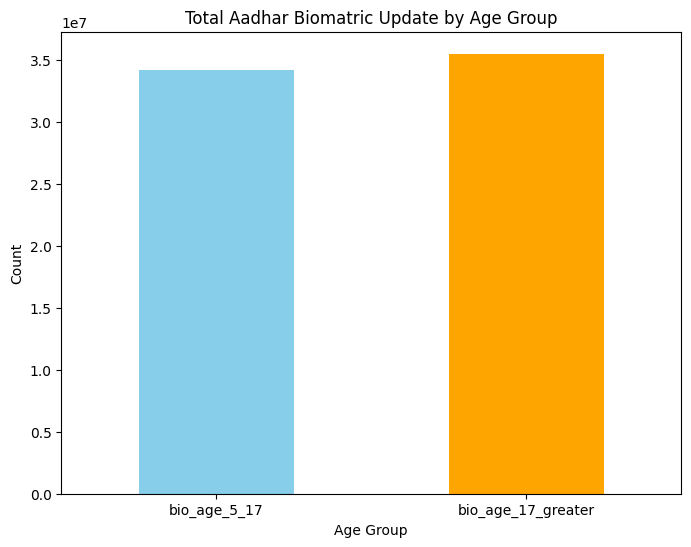

In [38]:
#Plot 1: Age Group Distribution
plt.figure(figsize=(8, 6))
age_sum.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Total Aadhar Biomatric Update by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.savefig('age_distribution.png')
plt.show()

C:\Users\ytsub\AppData\Local\Temp\ipykernel_2496\3706564524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states['total_update'], y=top_10_states.index, palette='viridis')


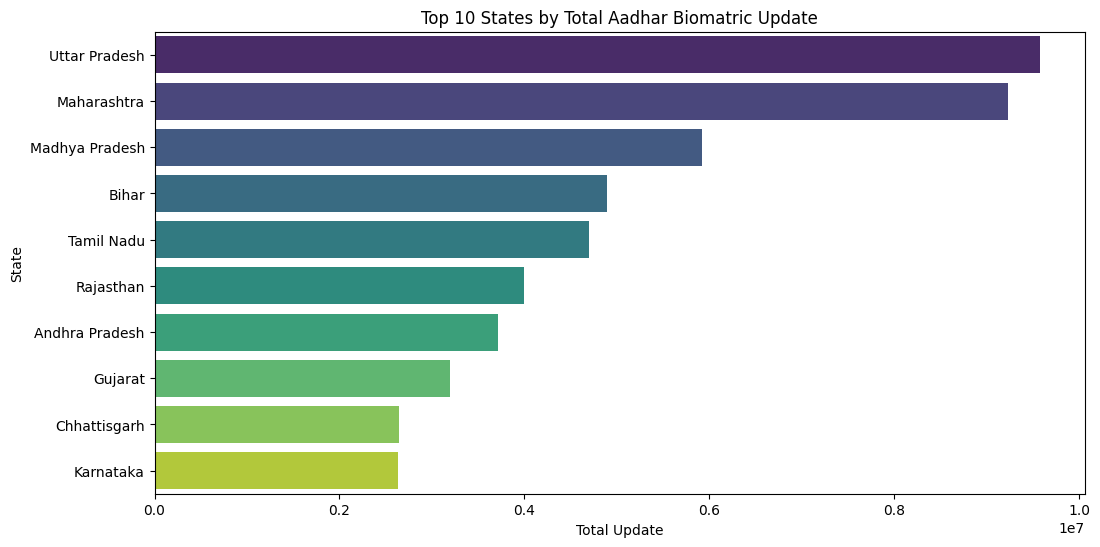

In [44]:
# Plot 2: Top 10 States by Total Enrolment
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states['total_update'], y=top_10_states.index, palette='viridis')
plt.title('Top 10 States by Total Aadhar Biomatric Update')
plt.xlabel('Total Update')
plt.ylabel('State')
plt.savefig('top_states.png')
plt.show()

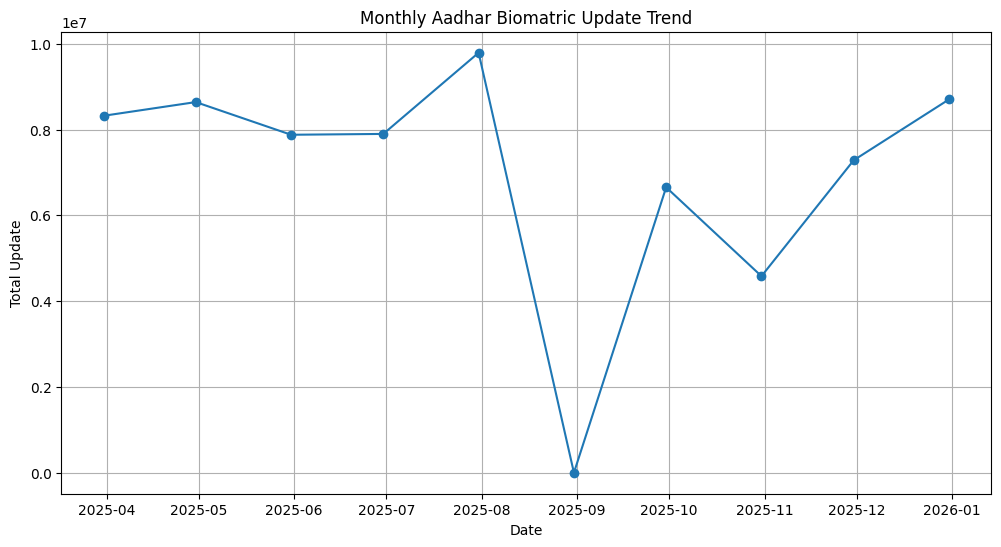

In [49]:
# Plot 3: Monthly Enrolment Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend['total_update'], marker='o')
plt.title('Monthly Aadhar Biomatric Update Trend')
plt.xlabel('Date')
plt.ylabel('Total Update')
plt.grid(True)
plt.savefig('enrolment_trend.png')
plt.show()